# Example for partitioning the scope of the AeroMAPS scenario using AeroSCOPE data

This notebook serves as an example for producing analyses on a reduced scope (e.g. regional) using AeroSCOPE data.

## 1. Generation of a corrected input file for the studied scope

Base values for calibrating a scenario can be obtained using [AeroSCOPE](www.aeromaps.eu/aeroscope).
The file is downloaded from the "AeroMAPS Export" tab, using the available filtering options. 

**Please refer to [AeroSCOPE description](https://github.com/AeroMAPS/AeroSCOPE) to understand the limitaions of the tool.**

Click on "Download File" to generate the input files for 2019, and place the *.csv* file in *data* folder as below. This folder is used to store the calibration *.csv*, but also a custom input file.

Here, an example is provided considering domestic and international flights departing from France (overseas not included). 
A dedicated function of AeroMAPS calibrates historical parameters by calibrating AeroMAPS values using AeroSCOPE partitionned file.  
A set of transformations is necessary to match a similar coverage as AeroSCOPE does not cover dedicated cargo flights. 

**⚠ Historical values are calibrated based on the comparision of AeroSCOPE 2019 values with AeroMAPS 2019 reference. Historical trajectories (RPK, energy consumption, emissions, ...) are scaled using this ratio and are NOT REPRESENTATIVE of actual historical values for the partition made, which can result in significant differences, in particular for climate models ⚠**

In [1]:
from aeromaps.utils.functions import create_partitioning

In [2]:
create_partitioning(file="data/aeroscope_france_data.csv", path="data")

## 2. Run AeroMAPS on this studied scope

In [ ]:
%matplotlib widget
from aeromaps import create_process

Create process as usual, the partitionning is recuperated as specified in the config file.

In [ ]:
process = create_process(configuration_file="data/config.yaml")

 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.
 WARNING - 10:55:03: The Args section is missing.


In [6]:
process.compute()
process.write_json()

Running MDA


C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_co2_emission_factor_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(
C:\Users\t.planes\PycharmProjects\AeroMAPS\aeromaps\models\yaml_interpolator.py:127: UserWarning: 
[Interpolation Model: fossil_kerosene_mean_mfsp_without_resource Warning]
The first reference year (2000) differs from the prospection start year (2020).
Interpolation will begin at the first reference year.
  warnings.warn(


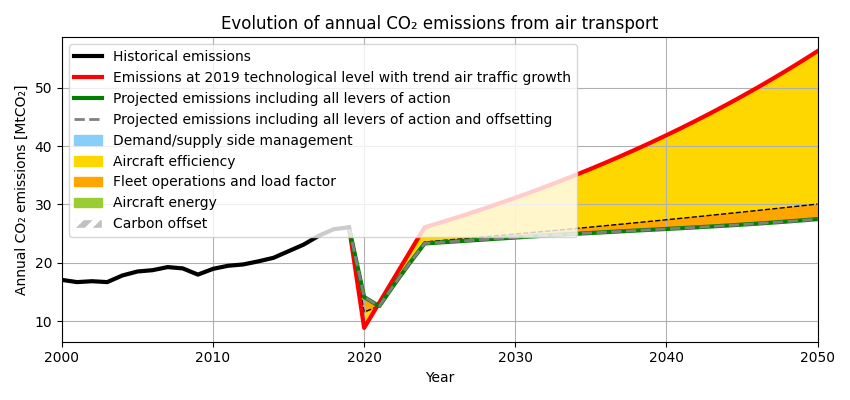

In [7]:
process.plot("air_transport_co2_emissions", save=False)

In [8]:
# Verify the outputs between .outputs.json and data/reference/outputs.json
from aeromaps.utils.functions import compare_json_files

files_are_different = compare_json_files(
    "./data/reference/outputs.json",
    "./data/outputs.json",
    ignore_order=False,
    rtol=0.0001,
    atol=0,
)

if files_are_different:
    raise ValueError("The outputs.json files are different.")

No differences found.


In [9]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())